## Modelo de Ising aplicado à cristalização de proteínas sustentada por MOF

Estruturas metalorgânicas são uma classe de materiais constituídos por uma rede cristalina formada por nós metálicos e ligantes orgânicos. A depender do composto orgânico utilizado, a célula unitária dessa estrutura cristalina pode apresentar tamanhos diferentes, assim como diferentes tipos de potenciais eletrônicos [1]. Alguns tipos de MOF possuem um tamanho de célula unitária semelhante ao tamanho de algumas proteínas, o que possibilita a utilização dessas estruturas cristalinas como sustentação de enzimas para catálise [2], ou a nucleação de cristais de proteína na superfície das MOFs [3]. A interação da proteína com a estrutura cristalina das MOFs pode facilitar a formação de cristais ou permitir a formação de estruturas meta-estáveis de cristais proteicos. 

Para compreender a forma como as proteínas interagem com as estruturas metalorgânicas, é necessário conhecer alguns parâmetros envolvidos nessa interação. Portanto, propomos o cálculo da energia on site da proteína Lisozima em alguns tipos de MOFs. A partir da parametrização feita por meio do cálculo da energia das interação, propomos a utilização do modelo de Ising bidimensional [4] para a descrição de processos de formação cristalina de proteínas na superfície das estruturas metalorgânicas.

- [1] - H.-C. J. Zhou and S. Kitagawa, Chem Soc Rev 43, 5415.
- [2] - Y. Du, X. Jia, L. Zhong, Y. Jiao, Z. Zhang, Z. Wang, Y. Feng, M. Bilal, J. Cui, and S. Jia,
Coordination Chemistry Reviews 454, 214327 (2022).
- [3] - Q. Yang, Z. Zhang, L. Wang, X. Xing, J. Zhou, and L. Li, Nanomaterials 13 (2023), 10.3390/nano13142064.
- [4] - E. Ising, Zeitschrift fur Physik 31, 253 (1925).

### Definições do sistema

Para uma primeira abordagem, serão consideradas 2 rotações diferentes para a proteínas, designadas como estado up ($\uparrow$) e estado down ($\downarrow$). Além disso, será considerada uma estrutura de rede quadrada da MOF, de forma que os sítios de sustentação de proteínas serão representados por uma malha de posições onde as proteínas podem estar. Será considerada uma energia de interação entre as proteínas, dependente da conformação das proteínas, além disso, será considerada só a interação entre os primeiros vizinos, de forma que a Hamiltoniana do sistema pode ser dada por:

$
H_j = n_{\uparrow} \epsilon_{\uparrow} + n_{\downarrow} \epsilon_{\downarrow} + \sum_{i, j} \epsilon_{i, j}
$

$ \sum_{i, j} \epsilon_{i, j} $ é calculado a partir da interação de primeiros vizinhos.

Será utilizado o modelo Gram-canônico, em que será considerado um potencial químico para a entrada de proteínas 

In [50]:
import numpy as np
from itertools import combinations

import matplotlib.pyplot as plt

from scipy.constants import physical_constants

In [51]:
kb = 1#physical_constants['Boltzmann constant in eV/K'][0]
cell_size = (3,3)
n = 3

In [52]:
e_sph = 0
e_sph_sph = -1

### Definição das classes

In [53]:
class sphere:
    def __init__(self):
        self.tag = '°'

    def __repr__(self):
        return '°'

    def __mul__(self, other):
        if self.tag == other.tag:
            return e_sph_sph
        if other.tag == ' ':
            return 0
        
class empty:
    def __init__(self):
        self.tag = ' '

    def __repr__(self):
        return ' '
    
    def __mul__(self, other):
        return 0

### Gerando todas as matrizes possíveis

In [54]:
def generate_matrices_sph(cell_size, n):
    total_cells = cell_size[0] * cell_size[1]

    if n > total_cells:
        return []

    matrix = [[empty() for _ in range(cell_size[1])] for _ in range(cell_size[0])]

    sph_positions = list(combinations(range(total_cells), n))

    matrices = []

    for positions in sph_positions:
        current_matrix = [row[:] for row in matrix]
        for position in positions:
            row = position // cell_size[1]
            col = position % cell_size[1]
            current_matrix[row][col] = sphere()
        matrices.append(current_matrix)

    return matrices

### Funções de partição

In [55]:
def Ej(matrix, n):
    int_col = np.sum(np.roll(matrix, 0) * np.roll(matrix, 1))
    int_row = np.sum(np.roll(matrix, 0, axis=0) * np.roll(matrix, 1, axis=0))

    sum_delta = int_col + int_row

    return n * e_sph + sum_delta

In [56]:
def z(n, temp):
    matrices = generate_matrices_sph(cell_size, n)
    beta = 1/(kb*temp)
    z_value = 0
    for matrix in matrices:
        ej = Ej(matrix,n)
        z_value += np.exp(-beta * ej)
    return z_value

In [57]:
def xi(mu, temp):
    beta = 1/(kb*temp)
    N = cell_size[0] * cell_size[1]
    xi_value = 0
    for n in range(N+1):
        z_value = z(n, temp)
        exp_fac = np.exp(beta * mu * n)
        xi_value += z_value * exp_fac
    return xi_value

### Grande potencial termodinâmico

In [58]:
def phi(mu, temp):
    beta = 1/(kb*temp)
    xi_value = xi(mu,temp)
    return -(1/beta) * np.log(xi_value)

### Energia do sistema cristalino

In [59]:
crystal = generate_matrices_sph(cell_size, cell_size[0]*cell_size[1])

In [60]:
crystal_energy = Ej(crystal, cell_size[0]*cell_size[1])

In [61]:
crystal_energy

-18

In [78]:
mu_values = np.linspace(-10,10,1000)
temp_values = np.linspace(0,101,200)

C:\Users\pedro220045\AppData\Local\Temp\ipykernel_43188\1058281038.py:2: RuntimeWarning: divide by zero encountered in divide
  beta = 1/(kb*temp)
C:\Users\pedro220045\AppData\Local\Temp\ipykernel_43188\3844741131.py:3: RuntimeWarning: divide by zero encountered in divide
  beta = 1/(kb*temp)
C:\Users\pedro220045\AppData\Local\Temp\ipykernel_43188\3844741131.py:7: RuntimeWarning: invalid value encountered in multiply
  z_value += np.exp(-beta * ej)
C:\Users\pedro220045\AppData\Local\Temp\ipykernel_43188\3286783073.py:8: RuntimeWarning: invalid value encountered in multiply
  xi_value += z_value * exp_fac


AttributeError: AxesImage.set() got an unexpected keyword argument 'center'

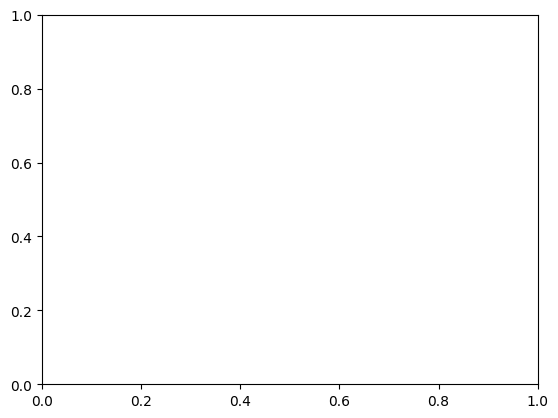

In [83]:
mu_grid, temp_grid = np.meshgrid(mu_values, temp_values)

phi_values = phi(mu_grid, temp_grid)
phi_values -= crystal_energy

plt.imshow(phi_values, extent=(mu_values.min(), mu_values.max(), temp_values.min(), temp_values.max()), aspect='auto', cmap='seismic', center=0)
plt.colorbar(label='Phi')  
plt.xlabel('Mu')
plt.ylabel('Temperatura')

plt.show()